## Imports

In [4]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Create data frame

In [5]:
df_uni_rank_2020 = pd.read_csv('university_rank_2020.csv', index_col='University')
df_uni_rank = pd.read_csv('university_rank_other.csv', delim_whitespace=True)
df_uni_rank_students = pd.read_excel('university_rank_students.xlsx', index_col='University', sheet_name="Sheet1")

df = pd.concat([df_uni_rank_2020, df_uni_rank, df_uni_rank_students], axis=1)

In [6]:
print(df.shape)

(1396, 13)


In [7]:
print(df.dtypes)

Country                       object
Number_students              float64
Numb_students_per_Staff      float64
Score_Result                 float64
Rank                           int64
Teaching                     float64
Research                     float64
Citations                    float64
Industry_Income              float64
International_Outlook         object
International_Students(%)    float64
Percentage_Female(%)         float64
Percentage_Male(%)           float64
dtype: object


In [8]:
print(df.head(10))

                                              Country  Number_students  \
University of Oxford                   United Kingdom           20.664   
California Institute of Technology      United States            2.240   
University of Cambridge                United Kingdom           18.978   
Stanford University                     United States           16.135   
Massachusetts Institute of Technology   United States           11.247   
Princeton University                    United States            7.983   
Harvard University                      United States           20.823   
Yale University                         United States           12.402   
University of Chicago                   United States           13.833   
Imperial College London                United Kingdom           16.760   

                                       Numb_students_per_Staff  Score_Result  \
University of Oxford                                      11.2          95.4   
California Institute of T

In [9]:
print(df.isnull().sum())

Country                       0
Number_students               0
Numb_students_per_Staff       0
Score_Result                  0
Rank                          0
Teaching                      0
Research                      0
Citations                     0
Industry_Income               0
International_Outlook        11
International_Students(%)    38
Percentage_Female(%)         36
Percentage_Male(%)           27
dtype: int64


# Clean dataset

Fill NaN values with column average on numeric columns

In [10]:
numeric_columns = df.select_dtypes(np.number).columns
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df[numeric_columns] = imp.fit_transform(df[numeric_columns])

print(df.isnull().sum())

Country                       0
Number_students               0
Numb_students_per_Staff       0
Score_Result                  0
Rank                          0
Teaching                      0
Research                      0
Citations                     0
Industry_Income               0
International_Outlook        11
International_Students(%)     0
Percentage_Female(%)          0
Percentage_Male(%)            0
dtype: int64


Fill NaN with most frequent on non-numeric columns

In [11]:
categoric_columns = df.select_dtypes(object).columns
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[categoric_columns] = imp.fit_transform(df[categoric_columns])

print(df.isnull().sum())

Country                      0
Number_students              0
Numb_students_per_Staff      0
Score_Result                 0
Rank                         0
Teaching                     0
Research                     0
Citations                    0
Industry_Income              0
International_Outlook        0
International_Students(%)    0
Percentage_Female(%)         0
Percentage_Male(%)           0
dtype: int64


Save df to .csv

In [12]:
df.to_csv("university_rank_no_nan.csv", sep=';', decimal='.', encoding='utf-8')

## Divide df to train and test datasets

   - dataset should only contain numeric values
   - we will predict "International outlook" column

In [13]:
X = df[numeric_columns]
y = df["International_Outlook"]
print(X.head())

                                       Number_students  \
University of Oxford                            20.664   
California Institute of Technology               2.240   
University of Cambridge                         18.978   
Stanford University                             16.135   
Massachusetts Institute of Technology           11.247   

                                       Numb_students_per_Staff  Score_Result  \
University of Oxford                                      11.2          95.4   
California Institute of Technology                         6.4          94.5   
University of Cambridge                                   10.9          94.4   
Stanford University                                        7.3          94.3   
Massachusetts Institute of Technology                      8.6          93.6   

                                       Rank  Teaching  Research  Citations  \
University of Oxford                    1.0      90.5      99.6       98.4   
California Ins

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=789)

# Decision tree classifier

- print first 4 predictions
- print model accuracy

In [15]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(predictions[:4])
print("Accuracy: ", metrics.accuracy_score(predictions, y_test))

['bad' 'bad' 'good' 'bad']
Accuracy:  0.9928400954653938


# Prediction accuracy metrics

### Precision
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.
The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

In [16]:
print('Precision:', metrics.precision_score(predictions, y_test, average='micro'))

Precision: 0.9928400954653938


### Recall
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [17]:
print('Recall:', metrics.recall_score(predictions, y_test, average='micro'))

Recall: 0.9928400954653938


## F1-score
The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. It is primarily used to compare the performance of two classifiers. Suppose that classifier A has a higher recall, and classifier B has higher precision.

In [18]:
print('F1-score:', metrics.f1_score(predictions, y_test, average='micro'))

F1-score: 0.9928400954653938


## Graph to show relationship between International_Outlook and Teaching values

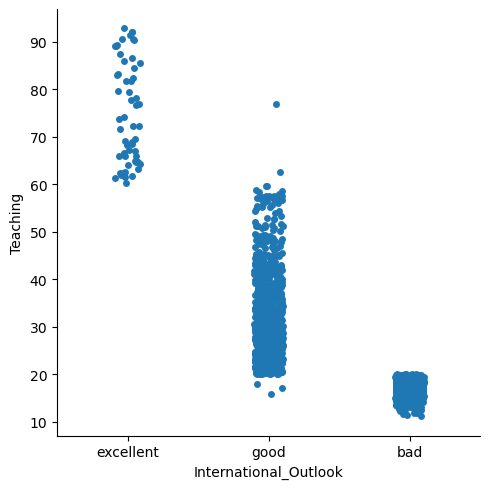

In [19]:
print(sns.catplot(x="International_Outlook", y="Teaching", data=df))

# Repeat the same process but without Teaching column

In [20]:
columns_list = numeric_columns.values.tolist()
columns_list.pop(4)

X = df[columns_list]
y = df["International_Outlook"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=789)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(predictions, y_test))

Accuracy:  0.7923627684964201


# Using K-fold validation and other classifiers

In [21]:
classifiers = [DecisionTreeClassifier(), LogisticRegression(), LinearSVC(), KNeighborsClassifier(), GaussianNB(),
               RandomForestClassifier(), ExtraTreesClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
accuracy = {}
for model in classifiers:
    kfold = StratifiedKFold(n_splits=8, random_state=123, shuffle=True)
    predictions = cross_val_score(model, df[numeric_columns], y, cv=kfold, scoring='accuracy')
    accuracy[type(model).__name__] = predictions.mean()
    print(f'{type(model).__name__ : >30}: {predictions.mean():1.4f}')

        DecisionTreeClassifier: 0.9950
            LogisticRegression: 0.9671


/opt/homebrew/Caskroom/miniforge/base/envs/env_ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/env_ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

                     LinearSVC: 0.9026
          KNeighborsClassifier: 0.8582
                    GaussianNB: 0.8453
        RandomForestClassifier: 0.9950
          ExtraTreesClassifier: 0.9699
            AdaBoostClassifier: 0.9928
    GradientBoostingClassifier: 0.9957


AxesSubplot(0.125,0.11;0.775x0.77)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'DecisionTreeClassifier'),
  Text(1, 0, 'LogisticRegression'),
  Text(2, 0, 'LinearSVC'),
  Text(3, 0, 'KNeighborsClassifier'),
  Text(4, 0, 'GaussianNB'),
  Text(5, 0, 'RandomForestClassifier'),
  Text(6, 0, 'ExtraTreesClassifier'),
  Text(7, 0, 'AdaBoostClassifier'),
  Text(8, 0, 'GradientBoostingClassifier')])

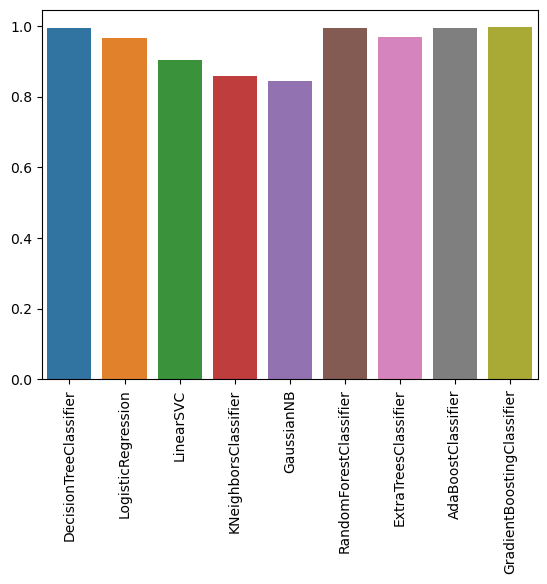

In [22]:
accuracy = pd.DataFrame(accuracy, index=['i', ])
print(sns.barplot(data=accuracy))
plt.xticks(rotation=90)